In [20]:
# import modules
import os
import operator
import numpy as np
import matplotlib.pyplot as plt
import pysynphot as S
import warnings

warnings.filterwarnings('ignore')

In [2]:
class Star:
    
    def __init__(self, wav, F):
        self.wav = wav
        self.F = F
    
    def __repr__(self):
        return f'Star({self.wav}, {self.F})'
    
    def __eq__(self, other):
        return type(other)==Star and self.wav==other.wav and self.F==other.F

In [3]:
class Planet:
    
    def __init__(self, wav, rad):
        self.wav = wav
        self.rad = rad
    
    def __repr__(self):
        return f'Planet({self.wav}, {self.rad})'
    
    def __eq__(self, other):
        return type(other)==Planet and self.wav==other.wav and self.rad==other.rad

In [4]:
class Noise:
    
    def __init__(self, wav, pre):
        self.wav = wav
        self.pre = pre
    
    def __repr__(self):
        return f'Noise({self.wav}, {self.pre})'
    
    def __eq__(self, other):
        return type(other)==Noise and self.wav==other.wav and self.pre==other.pre

In [5]:
# solar parameters
Teff_s = 2500               # effective temperature [K]
FeH_s = 0.0                 # metalicity [ln(Fe/H)]
logg_s = np.log10(27400)    # surface gravity [ln(g)]
Kmag = 3.28                 # K band magnitude

In [6]:
# initialize model
s_model = []  # star model
p_model = []  # planet model
precis = []   # noise model

In [31]:
star = S.Icat('phoenix', Teff_s, FeH_s, logg_s)
#star_norm = star.renorm(Kmag, 'vegamag', S.ObsBandpass('johnson,k'))

In [32]:
star.convert('Micron')
#star_norm.convert('flam')

In [10]:
Npoints = len(star.wave)

In [18]:
for i in range(0, Npoints):
    if (star_norm.wave[i]<0.5):
        start = i
    if (star_norm.wave[i]<=28.5):
        stop = i

for i in range(start, stop):
    wav = star_norm.wave[i]
    F = star_norm.flux[i]*1.e8
    s_model.append(Star(wav, F))

In [21]:
ns_points = len(s_model)
s_model.sort(key=operator.attrgetter('wav'))

(0, 5)

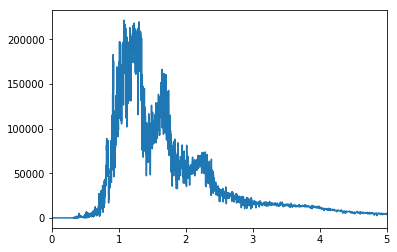

In [34]:
plt.plot(star.wave, star.flux)
plt.xlim(0, 5)